In [1]:
import numpy as np
import pandas as pd

In [2]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
!python --version

Python 3.5.2 :: Anaconda custom (64-bit)


In [4]:
!ls -la

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
!ls -la ./data/train-jpg/*.jpg | wc -l

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
df_labels = pd.read_csv('./data/train-csv/train.csv')
df_labels.head(10)

image_name                                         tags
0    train_0                                 haze primary
1    train_1              agriculture clear primary water
2    train_2                                clear primary
3    train_3                                clear primary
4    train_4    agriculture clear habitation primary road
5    train_5                           haze primary water
6    train_6  agriculture clear cultivation primary water
7    train_7                                 haze primary
8    train_8        agriculture clear cultivation primary
9    train_9   agriculture clear cultivation primary road

In [7]:
labels = df_labels.tags.values
labels

array(['haze primary', 'agriculture clear primary water', 'clear primary',
       ..., 'agriculture clear primary', 'agriculture clear primary road',
       'agriculture cultivation partly_cloudy primary'], dtype=object)

In [8]:
labels_list = []
for lbl in labels:
    labels_list.extend(lbl.split(' '))
labels_set = set(labels_list)
labels_set

{'agriculture',
 'artisinal_mine',
 'bare_ground',
 'blooming',
 'blow_down',
 'clear',
 'cloudy',
 'conventional_mine',
 'cultivation',
 'habitation',
 'haze',
 'partly_cloudy',
 'primary',
 'road',
 'selective_logging',
 'slash_burn',
 'water'}

In [9]:
for i, label in enumerate(labels_set):
    print('label:%s  %d/%d' %(label, i+1, len(labels_set)))
    %time df_labels[label] = df_labels.tags.apply(lambda x : 1 if label in x.split(' ') else 0)


label:partly_cloudy  1/17
Wall time: 110 ms
label:road  2/17
Wall time: 155 ms
label:slash_burn  3/17
Wall time: 121 ms
label:blooming  4/17
Wall time: 102 ms
label:agriculture  5/17
Wall time: 121 ms
label:clear  6/17
Wall time: 97.6 ms
label:selective_logging  7/17
Wall time: 85.6 ms
label:artisinal_mine  8/17
Wall time: 81.6 ms
label:primary  9/17
Wall time: 90.1 ms
label:water  10/17
Wall time: 104 ms
label:cloudy  11/17
Wall time: 83.1 ms
label:conventional_mine  12/17
Wall time: 80.1 ms
label:bare_ground  13/17
Wall time: 78.5 ms
label:cultivation  14/17
Wall time: 73.4 ms
label:blow_down  15/17
Wall time: 84.2 ms
label:haze  16/17
Wall time: 68.8 ms
label:habitation  17/17
Wall time: 78.5 ms


In [10]:
df_labels

image_name                                               tags  \
0          train_0                                       haze primary   
1          train_1                    agriculture clear primary water   
2          train_2                                      clear primary   
3          train_3                                      clear primary   
4          train_4          agriculture clear habitation primary road   
5          train_5                                 haze primary water   
6          train_6        agriculture clear cultivation primary water   
7          train_7                                       haze primary   
8          train_8              agriculture clear cultivation primary   
9          train_9         agriculture clear cultivation primary road   
10        train_10         agriculture clear primary slash_burn water   
11        train_11                                clear primary water   
12        train_12                                             cloudy   
13        train_13                                      clear primary   
14        train_14                                             cloudy   
15        train_15                                      clear primary   
16        train_16                                      clear primary   
17        train_17                              partly_cloudy primary   
18        train_18                                      clear primary   
19        train_19                     agriculture clear primary road   
20        train_20                    agriculture clear primary water   
21        train_21                           clear primary road water   
22        train_22                              partly_cloudy primary   
23        train_23                     agriculture clear primary road   
24        train_24            conventional_mine partly_cloudy primary   
25        train_25                                      clear primary   
26        train_26                                     cloudy primary   
27        train_27            agriculture partly_cloudy primary water   
28        train_28                                      clear primary   
29        train_29                              partly_cloudy primary   
...            ...                                                ...   
40449  train_40449                                clear primary water   
40450  train_40450  agriculture cultivation partly_cloudy primary ...   
40451  train_40451                                      clear primary   
40452  train_40452                                      clear primary   
40453  train_40453                       artisinal_mine clear primary   
40454  train_40454                                      clear primary   
40455  train_40455  agriculture partly_cloudy primary road convent...   
40456  train_40456                                      clear primary   
40457  train_40457         clear primary road selective_logging water   
40458  train_40458                     agriculture clear primary road   
40459  train_40459                                clear primary water   
40460  train_40460                                      clear primary   
40461  train_40461                                             cloudy   
40462  train_40462                                      clear primary   
40463  train_40463                           agriculture haze primary   
40464  train_40464             agriculture partly_cloudy primary road   
40465  train_40465                            blow_down clear primary   
40466  train_40466                                      clear primary   
40467  train_40467                     agriculture clear primary road   
40468  train_40468                          agriculture clear primary   
40469  train_40469                                 haze primary water   
40470  train_40470                      clear habitation primary road   
40471  train_40471                                      clear prim

In [11]:
df_train = df_labels.tags.str.get_dummies(' ')
df_train.insert(0, 'image_name', df_labels.image_name)
df_train.head(10)

image_name  agriculture  artisinal_mine  bare_ground  blooming  blow_down  \
0    train_0            0               0            0         0          0   
1    train_1            1               0            0         0          0   
2    train_2            0               0            0         0          0   
3    train_3            0               0            0         0          0   
4    train_4            1               0            0         0          0   
5    train_5            0               0            0         0          0   
6    train_6            1               0            0         0          0   
7    train_7            0               0            0         0          0   
8    train_8            1               0            0         0          0   
9    train_9            1               0            0         0          0   

   clear  cloudy  conventional_mine  cultivation  habitation  haze  \
0      0       0                  0            0           0     1   
1      1       0                  0            0           0     0   
2      1       0                  0            0           0     0   
3      1       0                  0            0           0     0   
4      1       0                  0            0           1     0   
5      0       0                  0            0           0     1   
6      1       0                  0            1           0     0   
7      0       0                  0            0           0     1   
8      1       0                  0            1           0     0   
9      1       0                  0            1           0     0   

   partly_cloudy  primary  road  selective_logging  slash_burn  water  
0              0        1     0                  0           0      0  
1              0        1     0                  0           0      1  
2              0        1     0                  0           0      0  
3              0        1     0                  0           0      0  
4              0        1     1                  0           0      0  
5              0        1     0                  0           0      1  
6              0        1     0                  0           0      1  
7              0        1     0                  0           0      0  
8              0        1     0                  0           0      0  
9              0        1     1                  0           0      0

In [12]:
%matplotlib inline

In [13]:
df_train[list(labels_set)].sum().sort_values()

blow_down               98
conventional_mine      100
slash_burn             209
blooming               332
artisinal_mine         339
selective_logging      340
bare_ground            859
cloudy                2330
haze                  2695
habitation            3662
cultivation           4477
partly_cloudy         7251
water                 7262
road                  8076
agriculture          12338
clear                28203
primary              37840
dtype: int64

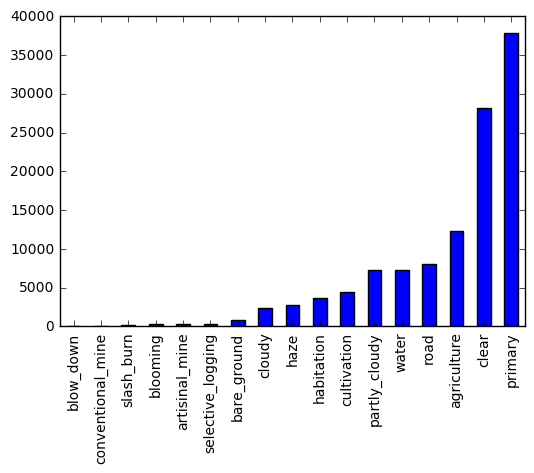

In [14]:
df_train[list(labels_set)].sum().sort_values().plot(kind='bar')

In [15]:
ordered_labels = df_train[list(labels_set)].sum().sort_values(ascending=False).index
type(ordered_labels)

pandas.indexes.base.Index

In [16]:
df_train[ordered_labels].corr()

primary     clear  agriculture      road     water  \
primary            1.000000  0.283810     0.099210  0.045952  0.070012   
clear              0.283810  1.000000     0.064648  0.089860  0.030442   
agriculture        0.099210  0.064648     1.000000  0.480014  0.070571   
road               0.045952  0.089860     0.480014  1.000000  0.109259   
water              0.070012  0.030442     0.070571  0.109259  1.000000   
partly_cloudy      0.103009 -0.708053     0.039452 -0.010423 -0.002324   
cultivation        0.086107  0.069867     0.344348  0.078995  0.013307   
habitation         0.016655  0.100905     0.303242  0.443161  0.057918   
haze               0.059691 -0.404804    -0.032171 -0.035629  0.033450   
cloudy            -0.793606 -0.374589    -0.158110 -0.122052 -0.092056   
bare_ground       -0.083321  0.054261    -0.013712  0.065034  0.023184   
selective_logging  0.024305  0.041876    -0.022718  0.056333 -0.008464   
artisinal_mine     0.007798  0.041759    -0.038472  0.028739  0.168284   
blooming           0.024015  0.047483    -0.041173 -0.038545 -0.031098   
slash_burn         0.019025  0.020534     0.041407 -0.004915 -0.012124   
conventional_mine  0.001047  0.000354    -0.007005  0.048626  0.010454   
blow_down          0.013010  0.018285    -0.008595 -0.022078 -0.019104   

                   partly_cloudy  cultivation  habitation      haze    cloudy  \
primary                 0.103009     0.086107    0.016655  0.059691 -0.793606   
clear                  -0.708053     0.069867    0.100905 -0.404804 -0.374589   
agriculture             0.039452     0.344348    0.303242 -0.032171 -0.158110   
road                   -0.010423     0.078995    0.443161 -0.035629 -0.122052   
water                  -0.002324     0.013307    0.057918  0.033450 -0.092056   
partly_cloudy           1.000000    -0.011085   -0.048282 -0.124759 -0.115447   
cultivation            -0.011085     1.000000    0.134545 -0.030354 -0.087150   
habitation             -0.048282     0.134545    1.000000 -0.039663 -0.077202   
haze                   -0.124759    -0.030354   -0.039663  1.000000 -0.066003   
cloudy                 -0.115447    -0.087150   -0.077202 -0.066003  1.000000   
bare_ground            -0.035704    -0.003282    0.050967 -0.011133 -0.036389   
selective_logging      -0.023934     0.017603   -0.016758 -0.019151 -0.022745   
artisinal_mine         -0.023842    -0.016849   -0.001577 -0.019106 -0.022712   
blooming               -0.030337    -0.001502   -0.024860 -0.019892 -0.022474   
slash_burn             -0.003989     0.113073    0.026548 -0.015092 -0.017804   
conventional_mine       0.013091    -0.011202    0.046761 -0.009298 -0.012299   
blow_down              -0.005971    -0.004550   -0.010279 -0.013157 -0.012175   

                   bare_ground  selective_logging  artisinal_mine  blooming  \
primary              -0.083321           0.024305        0.007798  0.024015   
clear                 0.054261           0.041876        0.041759  0.047483   
agriculture          -0.013712          -0.022718       -0.038472 -0.041173   
road                  0.065034           0.056333        0.028739 -0.038545   
water                 0.023184          -0.008464        0.168284 -0.031098   
partly_cloudy        -0.035704          -0.023934       -0.023842 -0.030337   
cultivation          -0.003282           0.017603       -0.016849 -0.001502   
habitation            0.050967          -0.016758       -0.001577 -0.024860   
haze                 -0.011133          -0.019151       -0.019106 -0.019892   
cloudy               -0.036389          -0.022745       -0.022712 -0.022474   
bare_ground           1.000000           0.010865        0.061708 -0.007688   
selective_logging     0.010865           1.000000        0.009365  0.012640   
artisinal_mine        0.061708           0.009365        1.000000 -0.008357   
blooming             -0.007688           0.012640       -0.008357  1.000000   
slash_burn            0.013310           0.

In [17]:
import seaborn as sns

In [18]:
df_occurence = df_train[ordered_labels].T.dot(df_train[ordered_labels])
df_occurence

primary  clear  agriculture  road  water  partly_cloudy  \
primary              37840  27668        11990  7733   7057           7173   
clear                27668  28203         9150  6295   5277              0   
agriculture          11990   9150        12338  6036   2718           2492   
road                  7733   6295         6036  8076   2127           1382   
water                 7057   5277         2718  2127   7262           1287   
partly_cloudy         7173      0         2492  1382   1287           7251   
cultivation           4455   3527         3377  1294    868            748   
habitation            3471   3090         2737  2787    915            441   
haze                  2668      0          672   394    613              0   
cloudy                 331      0           24     5     85              0   
bare_ground            683    744          225   323    206             74   
selective_logging      340    308           65   151     49             27   
artisinal_mine         324    307           38   110    299             27   
blooming               332    311           32    10     16             17   
slash_burn             209    173          119    36     24             33   
conventional_mine       94     70           24    59     26             28   
blow_down               98     85           22     2      3             13   

                   cultivation  habitation  haze  cloudy  bare_ground  \
primary                   4455        3471  2668     331          683   
clear                     3527        3090     0       0          744   
agriculture               3377        2737   672      24          225   
road                      1294        2787   394       5          323   
water                      868         915   613      85          206   
partly_cloudy              748         441     0       0           74   
cultivation               4477         895   202       0           89   
habitation                 895        3662   129       2          163   
haze                       202         129  2695       0           41   
cloudy                       0           2     0    2330            0   
bare_ground                 89         163    41       0          859   
selective_logging           58          13     5       0           13   
artisinal_mine              18          29     5       0           40   
blooming                    35           4     4       0            3   
slash_burn                 126          41     3       0           10   
conventional_mine            4          36     2       0           10   
blow_down                    8           3     0       0            4   

                   selective_logging  artisinal_mine  blooming  slash_burn  \
primary                          340             324       332         209   
clear                            308             307       311         173   
agriculture                       65              38        32         119   
road                             151             110        10          36   
water                             49             299        16          24   
partly_cloudy                     27              27        17          33   
cultivation                       58              18        35         126   
habitation                        13              29         4          41   
haze                               5               5         4           3   
cloudy                             0               0         0           0   
bare_ground                       13              40         3          10   
selective_logging                340               6         7           2   
artisinal_mine                     6             339         0           0   
blooming                           7               0       332           2   
slash_burn                         2               0         2         209   
conventional_mine                  0               

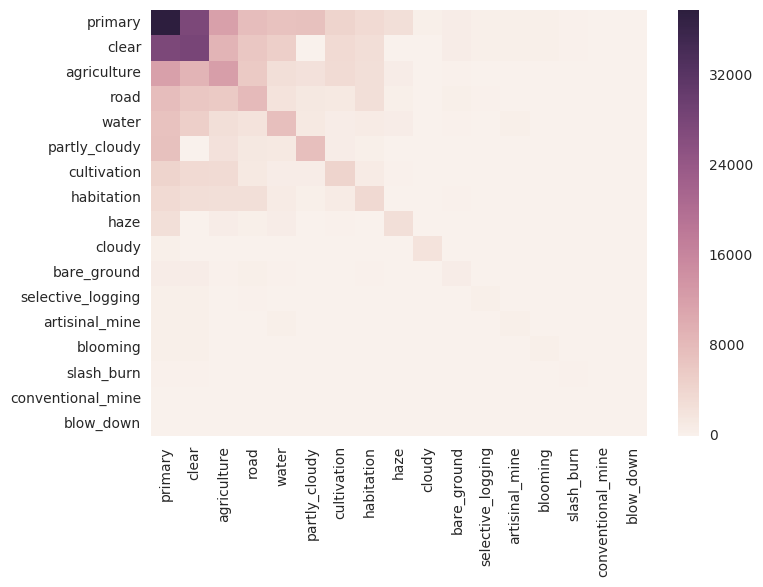

In [19]:
sns.heatmap(df_occurence)

In [20]:
df_percentage = df_train[ordered_labels].sum() / df_train[ordered_labels].count() * 100
df_percentage

primary              93.480570
clear                69.673164
agriculture          30.480002
road                 19.951086
water                17.940167
partly_cloudy        17.912992
cultivation          11.060056
habitation            9.046666
haze                  6.657773
cloudy                5.756071
bare_ground           2.122088
selective_logging     0.839942
artisinal_mine        0.837471
blooming              0.820178
slash_burn            0.516317
conventional_mine     0.247042
blow_down             0.242101
dtype: float64

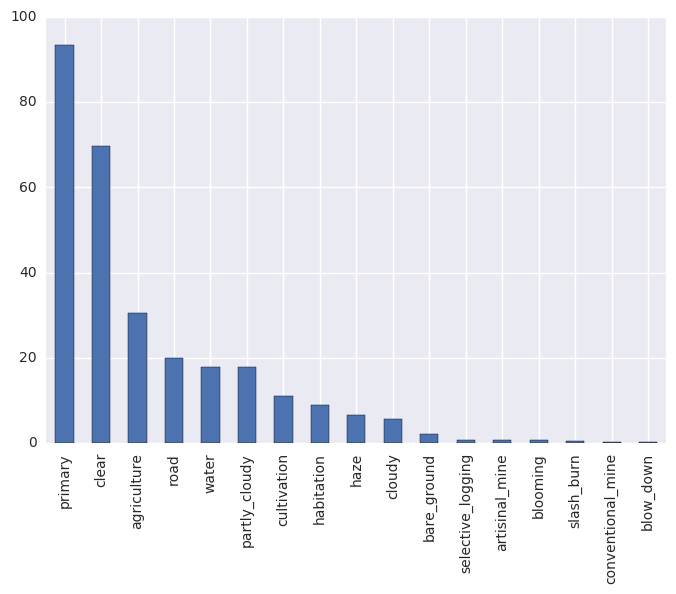

In [21]:
df_percentage.plot(kind='bar')

In [22]:
TRAIN_PATH = './data/train-jpg/'

In [23]:
import os

In [24]:
from PIL import Image
import random
import matplotlib.pyplot as plt

In [25]:
def plot_graph(label):

    images = df_train[df_train[label] == 1].image_name.values

    fig , ax = plt.subplots(nrows=3, ncols=3, figsize=(8,8))
    ax = ax.flatten()

    for i in range(0,9):
        f = random.choice(images)
        img = Image.open(os.path.join(TRAIN_PATH, f + '.jpg'))
        ax[i].imshow(img)
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        ax[i].set_title("%s h:%s w:%s" % (f, img.height,img.width))
    plt.tight_layout()

Wall time: 4.12 s


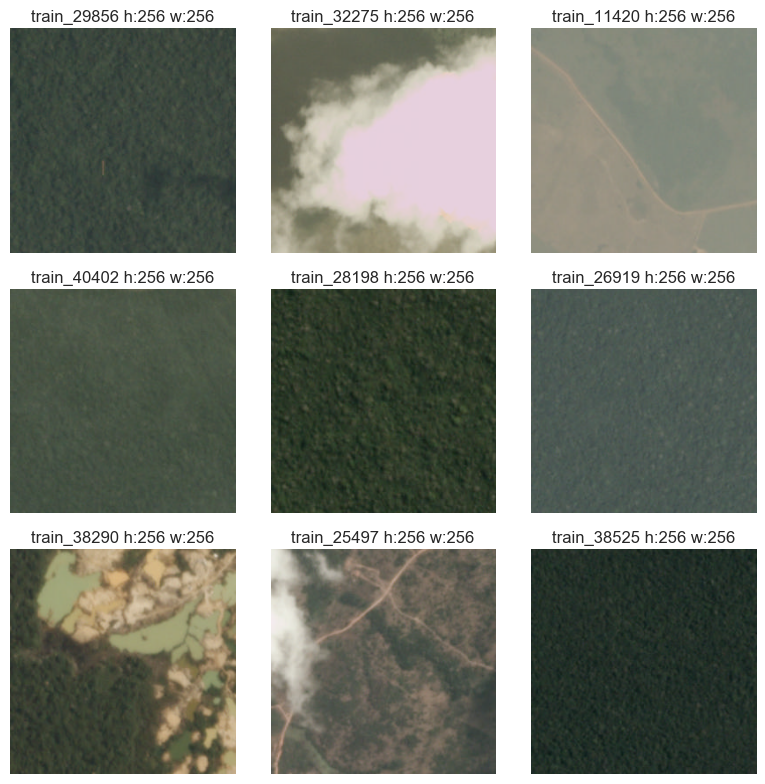

In [26]:
%time plot_graph('primary')

Wall time: 1.59 s


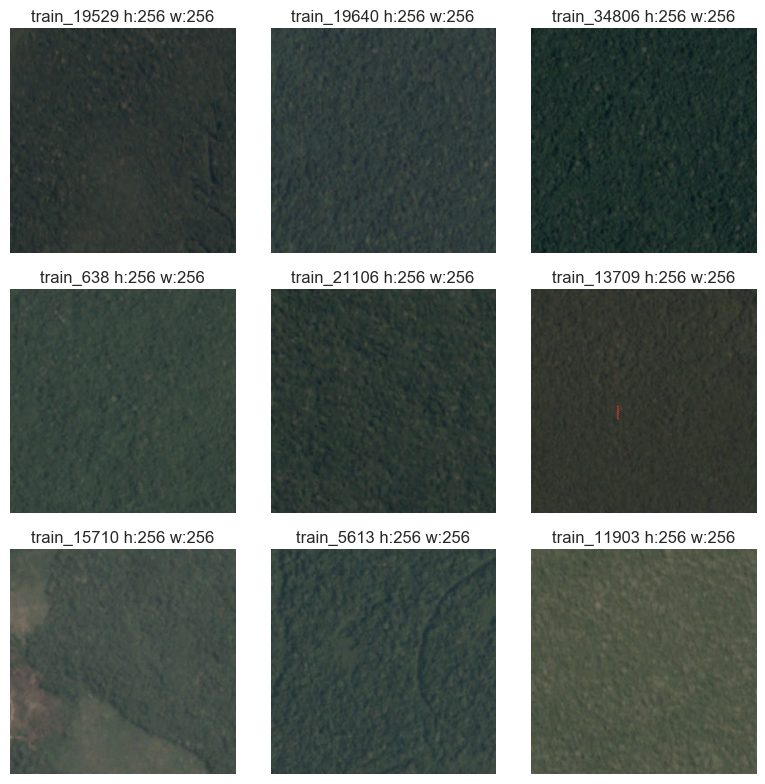

In [27]:
%time plot_graph('clear')

Wall time: 1.57 s


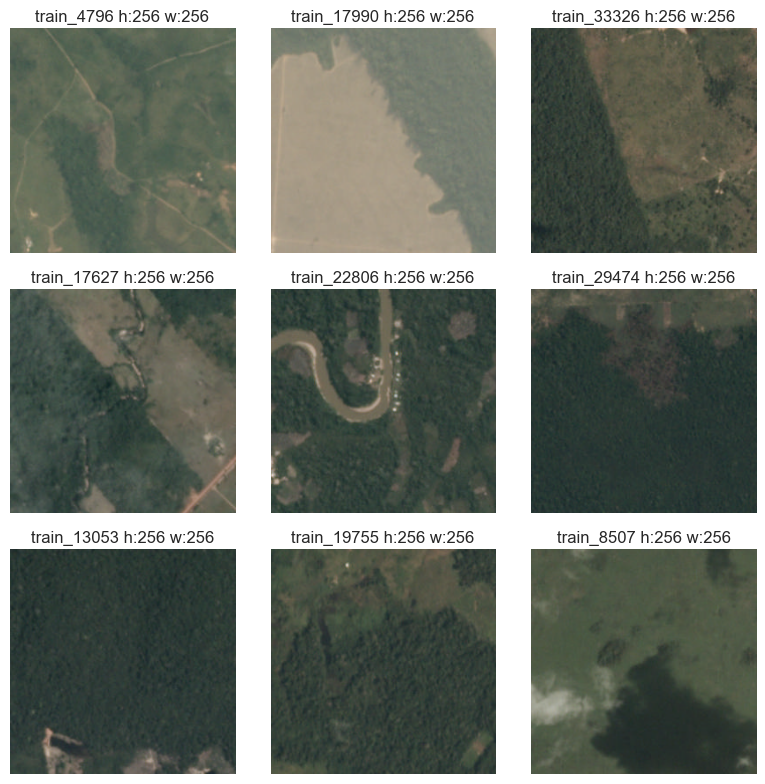

In [28]:
%time plot_graph('agriculture')

Wall time: 1.74 s


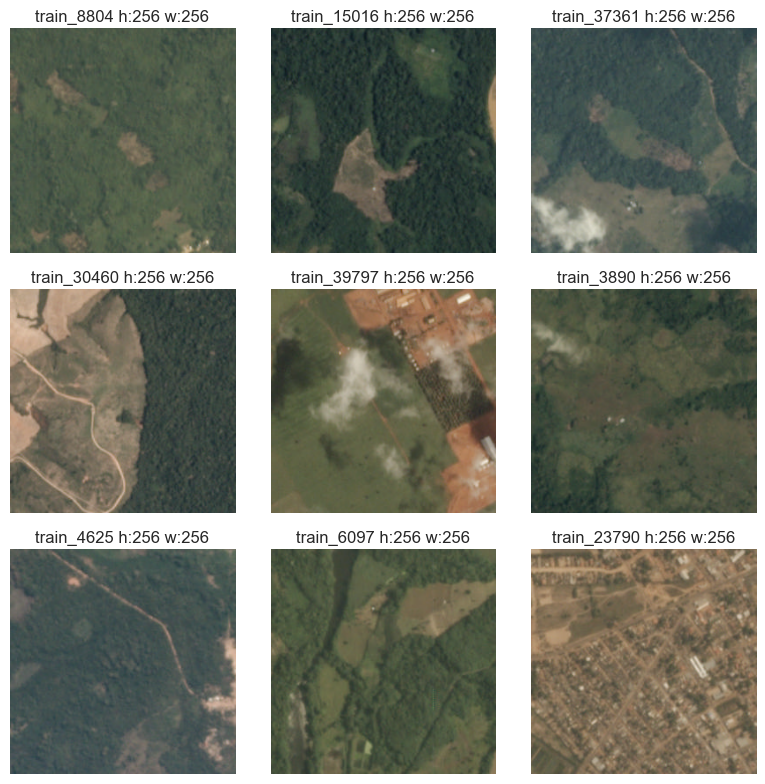

In [29]:
%time plot_graph('habitation')

In [30]:
%time df_train['image_name_w_ext'] = df_train.image_name.values + '.jpg'

Wall time: 17.1 ms


In [31]:
if not 'image_name_w_ext' in df_train.columns:
    %time df_train = df_train[['image_name', 'image_name_w_ext'] + list(df_train.columns.values[1:-1])]
df_train.head(10)

image_name  agriculture  artisinal_mine  bare_ground  blooming  blow_down  \
0    train_0            0               0            0         0          0   
1    train_1            1               0            0         0          0   
2    train_2            0               0            0         0          0   
3    train_3            0               0            0         0          0   
4    train_4            1               0            0         0          0   
5    train_5            0               0            0         0          0   
6    train_6            1               0            0         0          0   
7    train_7            0               0            0         0          0   
8    train_8            1               0            0         0          0   
9    train_9            1               0            0         0          0   

   clear  cloudy  conventional_mine  cultivation  habitation  haze  \
0      0       0                  0            0           0     1   
1      1       0                  0            0           0     0   
2      1       0                  0            0           0     0   
3      1       0                  0            0           0     0   
4      1       0                  0            0           1     0   
5      0       0                  0            0           0     1   
6      1       0                  0            1           0     0   
7      0       0                  0            0           0     1   
8      1       0                  0            1           0     0   
9      1       0                  0            1           0     0   

   partly_cloudy  primary  road  selective_logging  slash_burn  water  \
0              0        1     0                  0           0      0   
1              0        1     0                  0           0      1   
2              0        1     0                  0           0      0   
3              0        1     0                  0           0      0   
4              0        1     1                  0           0      0   
5              0        1     0                  0           0      1   
6              0        1     0                  0           0      1   
7              0        1     0                  0           0      0   
8              0        1     0                  0           0      0   
9              0        1     1                  0           0      0   

  image_name_w_ext  
0      train_0.jpg  
1      train_1.jpg  
2      train_2.jpg  
3      train_3.jpg  
4      train_4.jpg  
5      train_5.jpg  
6      train_6.jpg  
7      train_7.jpg  
8      train_8.jpg  
9      train_9.jpg

In [32]:
for f in df_train.image_name_w_ext:
    if os.path.exists(os.path.join(TRAIN_PATH, f)) == False:
        print("%s is missing" % image_name)

In [34]:
%time shapes = [Image.open(os.path.join(TRAIN_PATH, f)).size for f in df_train.image_name_w_ext[:1000]]

Wall time: 24.1 s


In [35]:
%time pd.Series(shapes).value_counts()

Wall time: 101 ms


(256, 256)    1000
dtype: int64

In [56]:
N_COLS = 256
N_ROWS = 256
N_CHANNELS = 3
MINI_BATCH_SIZE = 527
SHUFFLE = False
BATCH_SIZE = len(df_train)
NB_CATEGORIES = len(ordered_labels)
NB_EPOCHS = 10
X = np.ndarray((MINI_BATCH_SIZE, N_ROWS, N_COLS, N_CHANNELS), dtype = np.float16)

In [37]:
y_enc = df_train[ordered_labels].values
y_enc

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ..., 
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [38]:
%time idx = np.random.permutation(len(df_train)) if SHUFFLE == True else np.linspace(0,BATCH_SIZE,num=BATCH_SIZE,dtype=int)
idx

Wall time: 2 ms


array([    0,     1,     2, ..., 40476, 40477, 40479])

In [39]:
%time batches = np.array_split(idx, MINI_BATCH_SIZE)
batches

Wall time: 2 ms


[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76]),
 array([ 77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
         90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
        103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
        116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
        129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
        142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153]),
 array([154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
        167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
        180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 1

## Build Graph

In [226]:
import tensorflow as tf

In [227]:
tf.reset_default_graph()

In [228]:
sess = tf.InteractiveSession()

In [229]:
init = tf.global_variables_initializer()

In [230]:
X = tf.placeholder(dtype=tf.float32,shape=(None, 256,256,3), name="X")
y = tf.placeholder(dtype=tf.float32,shape=(None,17), name="y")

In [231]:
W_conv1 = tf.get_variable(name="W_conv1", shape=[5,5,3,64], dtype=tf.float32, initializer= tf.contrib.layers.xavier_initializer())
b_conv1 = tf.get_variable(name="b_conv1", shape=[64], dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())

W_conv2 = tf.get_variable(name="W_conv2", shape=[5,5,64,128], dtype=tf.float32, initializer= tf.contrib.layers.xavier_initializer())
b_conv2 = tf.get_variable(name="b_conv2", shape=[128], dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())

W_fc1 = tf.get_variable(name="W_fc1", shape=[64*64*128,1024], dtype=tf.float32, initializer= tf.contrib.layers.xavier_initializer())
b_fc1 = tf.get_variable(name="b_fc1", shape=[1024], dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())

W_fc2 = tf.get_variable(name="W_fc2", shape=[1024, 17], dtype=tf.float32, initializer= tf.contrib.layers.xavier_initializer())
b_fc2 = tf.get_variable(name="b_fc2", shape=[17], dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer())

In [232]:
conv1 = tf.nn.conv2d(
    input=X,
    filter=W_conv1,
    strides=[1,1,1,1],
    padding='SAME',
    name='conv1'
) #256 * 256 * 64

relu1 = tf.nn.relu(
    features = conv1 + b_conv1,
    name='relu1'
) #256 * 256 * 64

pool1 = tf.nn.max_pool(
    value = relu1,
    ksize=[1,2,2,1],
    strides=[1,2,2,1],
    padding='SAME',
    name='pool1'
) #128 * 128 * 64

In [233]:
conv2 = tf.nn.conv2d(
    input=pool1,
    filter=W_conv2,
    strides=[1,1,1,1],
    padding='SAME',
    name='conv2'
) #128 * 128 *128

relu2 = tf.nn.relu(
    features = conv2 + b_conv2,
    name='relu2'
) #128 * 128 *128

pool2 = tf.nn.max_pool(
    value = relu2,
    ksize=[1,2,2,1],
    strides=[1,2,2,1],
    padding='SAME',
    name='pool2'
) #64 * 64 *128

In [234]:
pool_2_flat = tf.reshape(
    tensor=pool2,
    shape=(-1,64*64*128),
    name='pool_2-flat'
)

In [235]:
fc1 = tf.nn.relu(tf.matmul(pool_2_flat,W_fc1) + b_fc1)

In [236]:
from tensorflow.contrib import learn

In [237]:
keep_prob = tf.placeholder(dtype=tf.float32, name="keep_prob")

In [238]:
dropout = tf.nn.dropout(
    x=fc1,
    keep_prob=keep_prob
)

In [239]:
fc2 = tf.matmul(dropout, W_fc2) + b_fc2 #1024 * 17

## Feed data

In [240]:
cross_entropy =  tf.nn.sigmoid_cross_entropy_with_logits(targets = y, logits= fc2)

In [241]:
train_step = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cross_entropy)

In [242]:
sess.run(init)

In [243]:
import cv2

In [246]:
for n in range(NB_EPOCHS):
    for i,batch in enumerate(batches):
        print ("epoch %d batch %d" % (n,i))
        
        images_names = df_train.loc[batch,:].image_name_w_ext
        images_names = images_names.apply(lambda x : os.path.join(TRAIN_PATH, x))
        
        images_array = np.asarray([cv2.imread(im, cv2.IMREAD_COLOR) for im in images_names])
        images_array = images_array / 255
        
        train_step.run(feed_dict={
                X: images_array, 
                y: y_enc[batch,:],
                keep_prob: 0.5
            })

epoch 0 batch 0


FailedPreconditionError: Attempting to use uninitialized value W_conv1
	 [[Node: W_conv1/read = Identity[T=DT_FLOAT, _class=["loc:@W_conv1"], _device="/job:localhost/replica:0/task:0/cpu:0"](W_conv1)]]

Caused by op 'W_conv1/read', defined at:
  File "C:\Program Files\Anaconda3\lib\runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Program Files\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Program Files\Anaconda3\Lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "C:\Program Files\Anaconda3\Lib\site-packages\traitlets\config\application.py", line 653, in launch_instance
    app.start()
  File "C:\Program Files\Anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "C:\Program Files\Anaconda3\Lib\site-packages\zmq\eventloop\ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "C:\Program Files\Anaconda3\Lib\site-packages\tornado\ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "C:\Program Files\Anaconda3\Lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Program Files\Anaconda3\Lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "C:\Program Files\Anaconda3\Lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "C:\Program Files\Anaconda3\Lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "C:\Program Files\Anaconda3\Lib\site-packages\tornado\stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "C:\Program Files\Anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "C:\Program Files\Anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "C:\Program Files\Anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "C:\Program Files\Anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Program Files\Anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Program Files\Anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Program Files\Anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "C:\Program Files\Anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-231-caacea4dee1e>", line 1, in <module>
    W_conv1 = tf.get_variable(name="W_conv1", shape=[5,5,3,64], dtype=tf.float32, initializer= tf.contrib.layers.xavier_initializer())
  File "C:\Program Files\Anaconda3\Lib\site-packages\tensorflow\python\ops\variable_scope.py", line 1024, in get_variable
    custom_getter=custom_getter)
  File "C:\Program Files\Anaconda3\Lib\site-packages\tensorflow\python\ops\variable_scope.py", line 850, in get_variable
    custom_getter=custom_getter)
  File "C:\Program Files\Anaconda3\Lib\site-packages\tensorflow\python\ops\variable_scope.py", line 346, in get_variable
    validate_shape=validate_shape)
  File "C:\Program Files\Anaconda3\Lib\site-packages\tensorflow\python\ops\variable_scope.py", line 331, in _true_getter
    caching_device=caching_device, validate_shape=validate_shape)
  File "C:\Program Files\Anaconda3\Lib\site-packages\tensorflow\python\ops\variable_scope.py", line 677, in _get_single_variable
    expected_shape=shape)
  File "C:\Program Files\Anaconda3\Lib\site-packages\tensorflow\python\ops\variables.py", line 224, in __init__
    expected_shape=expected_shape)
  File "C:\Program Files\Anaconda3\Lib\site-packages\tensorflow\python\ops\variables.py", line 370, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "C:\Program Files\Anaconda3\Lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 1424, in identity
    result = _op_def_lib.apply_op("Identity", input=input, name=name)
  File "C:\Program Files\Anaconda3\Lib\site-packages\tensorflow\python\framework\op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "C:\Program Files\Anaconda3\Lib\site-packages\tensorflow\python\framework\ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "C:\Program Files\Anaconda3\Lib\site-packages\tensorflow\python\framework\ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value W_conv1
	 [[Node: W_conv1/read = Identity[T=DT_FLOAT, _class=["loc:@W_conv1"], _device="/job:localhost/replica:0/task:0/cpu:0"](W_conv1)]]


In [ ]:
images = df_train.loc[batches[0],:].image_name_w_ex

In [ ]:
images = images.apply(lambda x : os.path.join(TRAIN_PATH, x))

In [ ]:
images_array = [cv2.imread(im, cv2.IMREAD_COLOR) for im in images]

In [ ]:
im = np.asarray(images_array)
im[batches[0]].shape

In [ ]:
images_names = df_train.loc[batch,:].image_name_w_ext

In [ ]:
images_names

In [ ]:
images_names = images_names.apply(lambda x : os.path.join(TRAIN_PATH, x))

In [ ]:
images_names

In [ ]:
np.asarray([cv2.imread(im, cv2.IMREAD_COLOR) for im in images_names])